In [1]:
import numpy as np
import pandas as pd

In [2]:
no_bag_on_carousel_after_i_minutes_if_bag_on_plane = np.linspace(1, 0, 11)
period_count = len(no_bag_on_carousel_after_i_minutes_if_bag_on_plane)
no_bag_on_carousel_after_i_minutes_if_bag_on_plane

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

# Simulation

In [3]:
def get_bag_appearances():
    return no_bag_on_carousel_after_i_minutes_if_bag_on_plane < np.random.rand()

In [4]:
get_bag_appearances()

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [5]:
pd.DataFrame([get_bag_appearances() for _ in range(5000)]).mean()

0     0.0000
1     0.0984
2     0.2004
3     0.2980
4     0.3964
5     0.4928
6     0.5990
7     0.7008
8     0.7998
9     0.8958
10    1.0000
dtype: float64

In [6]:
def sim(p_of_bag_on_plane, n=5000):
    records = []
    for _ in range(n):
        bag_on_plane = np.random.rand() < p_of_bag_on_plane
        if bag_on_plane:
            bag_appearances = get_bag_appearances()
        else:
            bag_appearances = [False] * period_count

        records.append([bag_on_plane, *bag_appearances])
    return pd.DataFrame(records, columns=["bag_on_plane", *range(period_count)])

In [7]:
sim_df = sim(0.5, 20_000)

In [8]:
sim_df

,bag_on_plane,0,1,2,3,4,5,6,7,8,9,10
0,True,False,False,False,False,False,False,False,False,False,False,True
1,True,False,True,True,True,True,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,True,False,False,False,False,False,True,True,True,True,True,True
19996,True,False,True,True,True,True,True,True,True,True,True,True
19997,True,False,False,False,False,False,False,False,False,False,True,True
19998,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

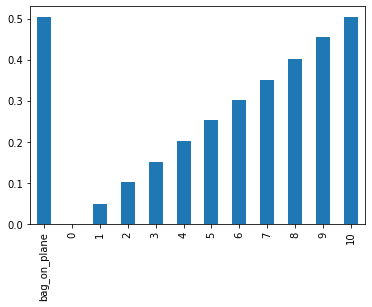

In [9]:
sim_df.mean().plot.bar()

In [10]:
sim_df.groupby("bag_on_plane").mean()

,0,1,2,3,4,5,6,7,8,9,10
bag_on_plane,,,,,,,,,,,
False,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
True,0.0,0.09766,0.20117,0.300218,0.398572,0.5,0.600635,0.696113,0.798037,0.901943,1.0


## SImulation Results

In [11]:
# sim_df.groupby(4).mean()

In [12]:
true_solution = pd.Series(
    {
        i: sim_df.groupby(i).mean().loc[False, "bag_on_plane"]
        for i in range(period_count)
    }
)  # .plot()

# Solution

$P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}$ 

- A: bag on plane
- B: x minutes passed without bag showing up

In [13]:
def get_solution1(p_of_bag_on_plane = 0.5):
    probs = []
    for pba in no_bag_on_carousel_after_i_minutes_if_bag_on_plane:
        pb = 1
        next_p = pba * p_of_bag_on_plane / pb
        probs.append(next_p)
    return pd.Series(probs)

In [14]:
def get_solution2(p_of_bag_on_plane = 0.5):
    probs = []
    for pba in no_bag_on_carousel_after_i_minutes_if_bag_on_plane:
        pb = 1
        next_p = pba * p_of_bag_on_plane / pb
        probs.append(next_p)
        p_of_bag_on_plane = next_p
    return pd.Series(probs)

In [15]:
def get_solution3(p_of_bag_on_plane = 0.5):
    probs = []
    for pba in no_bag_on_carousel_after_i_minutes_if_bag_on_plane:
        pb = (1 - p_of_bag_on_plane) + pba
        next_p = pba * p_of_bag_on_plane / pb
        probs.append(next_p)
        p_of_bag_on_plane = next_p
    return pd.Series(probs)

In [16]:
def get_solution4(p_of_bag_on_plane = 0.5):
    probs = []
    for pba in no_bag_on_carousel_after_i_minutes_if_bag_on_plane:
        pb = (1 - p_of_bag_on_plane) + pba * p_of_bag_on_plane
        next_p = pba * p_of_bag_on_plane / pb
        probs.append(next_p)
        p_of_bag_on_plane = next_p
    return pd.Series(probs)

In [ ]:
pd.DataFrame({
    "solution1": get_solution1(),
    "solution2": get_solution2(),
    "solution3": get_solution3(),
    "solution4": get_solution4(),

}).plot()